<div class="output_png output_subarea output_execute_result">
<center>
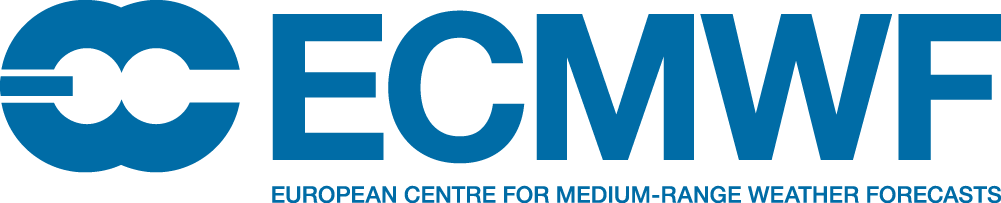
</div>

# Experimental: AIFS (ECMWF) ML model: 2m temperature and 10m wind

This notebook will provide you guidance how to explore and plot ECMWF AIFS open dataset to produce the map from the ECMWF open charts web product.  
The original product can be found on this link: https://charts.ecmwf.int/products/aifs_medium-2t-wind  


<div class="output_png output_subarea output_execute_result">
<center>
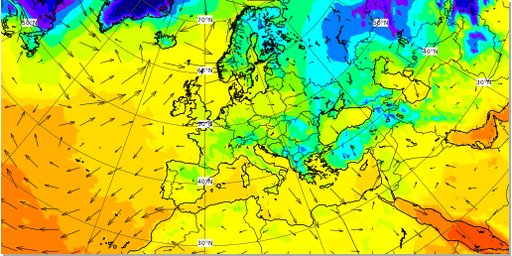</center>
</div>

The full list of available AIFS Open data products can be found [here](https://www.ecmwf.int/en/forecasts/dataset/aifs-machine-learning-data), and more information can be found in the [User documentation](https://confluence.ecmwf.int/display/DAC/ECMWF+open+data%3A+real-time+forecasts+from+IFS+and+AIFS+from+IFS+and+AIFS).  

Access to ECMWF AIFS data is governed by the Creative Commons CC-BY-4.0 licence and associated [Terms of Use](https://apps.ecmwf.int/datasets/licences/general/).  

<sub> In applying this licence, ECMWF does not waive the privileges and immunities granted to it by virtue of its status as an intergovernmental organisation nor does it submit to any jurisdiction </sub>

To find out how to obtain the access to the full forecast dataset [Access page](https://www.ecmwf.int/en/forecasts/accessing-forecasts).

## Retrieve Data
This product takes in input 3 parameters :

* [2 metre temperature](https://codes.ecmwf.int/grib/param-db/167)
* [10 metre U wind component](https://codes.ecmwf.int/grib/param-db/165)
* [10 metre V wind component](https://codes.ecmwf.int/grib/param-db/166)

In this example, we will use: 
- [**ecmwf.opendata**](https://github.com/ecmwf/ecmwf-opendata) Client to download the data
- [**Metview**](https://metview.readthedocs.io/en/latest/) library to read, process and plot the data 

First we need to install them in the current Jupyter kernel:  
<div class="alert alert-block alert-info">
<b>Note:</b> If you are running the notebook on MyBinder or already have the libraries installed, go directly to importing the libraries.
</div>
<div class="alert alert-block alert-info">
<b>Note:</b> If you don't have these libraries installed, click on three dots below, uncomment the code and run the next cell.
</div>

In [1]:
#!pip install ecmwf-opendata metview metview-python

In [2]:
import metview as mv
from ecmwf.opendata import Client

In [3]:
client = Client("ecmwf", beta=True)

In [4]:
parameters = ['10u', '10v','2t']
filename = 'aifs_medium-2t-wind.grib'
filename

'medium-2t-wind.grib'

Setting date to 0 will download today's data. 
Removing date and time altogether from the request will download the latest data.  
Try commenting out date and time to download latest forecast!

In [5]:
client.retrieve(
    date=0,
    time=0,
    step=12,
    stream="oper",
    type="fc",
    levtype="sfc",
    model="aifs",
    param=parameters,
    target=filename
)

20241225000000-12h-oper-fc.grib2:   0%|          | 0.00/1.92M [00:00<?, ?B/s]

## Reading and processing the data
Now we can use **ecmwf.data** to read the files.

In [6]:
data = mv.read(filename)

The **describe()** function will give us the overview of the dataset.  

In [7]:
data.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
10u,heightAboveGround,10,20241225,0,12,None,165,ai,oper,fc,0001
10v,heightAboveGround,10,20241225,0,12,None,166,ai,oper,fc,0001
2t,heightAboveGround,2,20241225,0,12,None,167,ai,oper,fc,0001


And an overview of one parameter, where we can see more information, such as units or type of level.

In [8]:
data.describe('2t')

shortName,2t
name,2 metre temperature
paramId,167
units,K
typeOfLevel,heightAboveGround
level,2
date,20241225
time,0
step,12
number,None
class,ai


We can use **ls()** function to list all the fields in the file we downloaded.

In [9]:
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
Message,,,,,,,,,,
0,ecmf,2t,heightAboveGround,2,20241225,0,12,fc,None,regular_ll
1,ecmf,10v,heightAboveGround,10,20241225,0,12,fc,None,regular_ll
2,ecmf,10u,heightAboveGround,10,20241225,0,12,fc,None,regular_ll


The grib file contains all the parameters, and we will use the **select()** function to filter what we need.  
Feel free to use **describe()** to inspect the other filtered fields.

In [10]:
t2m = data.select(shortName= "2t")
u = data.select(shortName= "10u")
v = data.select(shortName= "10v")

t2m.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
2t,heightAboveGround,2,20241225,0,12,None,167,ai,oper,fc,0001


We need to convert the temperature from Kelvin to Celsius

In [11]:
t2m -= 273.15

We need to create a wind vector field for the visualisation, as well.

In [12]:
wind_vector = mv.grib_vectors(u_component = u, v_component = v)

And finally, we can plot the data on the map. 

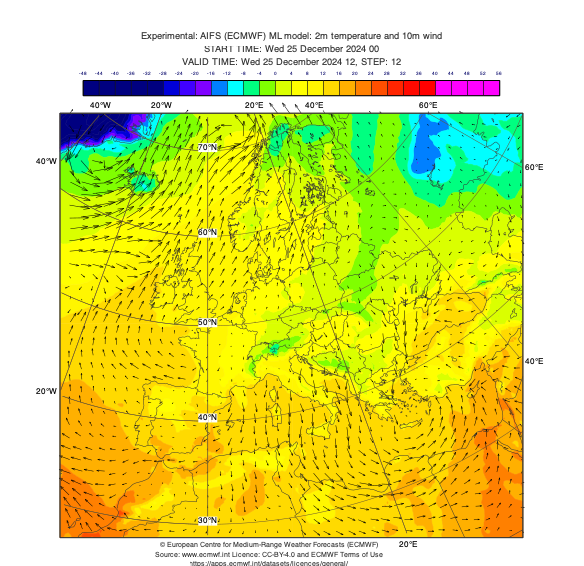

In [13]:
# define coastlines
coast = mv.mcoast(
    map_coastline_colour="charcoal",
    map_coastline_resolution="medium",
    map_coastline_land_shade="on",
    map_coastline_land_shade_colour="cream",
    map_coastline_sea_shade="off",
    map_boundaries="on",
    map_boundaries_colour= "charcoal",
    map_boundaries_thickness = 1,
    map_disputed_boundaries = "off",
    map_grid_colour="tan",
    map_label_height=0.35,
)

# define view
view = mv.geoview(
    area_mode="name",
    area_name="europe",
    coastlines=coast
)

#define styles
t2m_shade = mv.mcont(legend= "on",
                contour_automatics_settings = "style_name",
                contour_style_name = "sh_all_fM48t56i4")

wind_arrows = mv.mwind(
    wind_thinning_factor=5, wind_arrow_colour="black"
)

title = mv.mtext(
    text_lines = ["Experimental: AIFS (ECMWF) ML model: 2m temperature and 10m wind",
                  "START TIME: <grib_info key='base-date' format='%a %d %B %Y %H' where='shortName=2t'/> ",
                  "VALID TIME: <grib_info key='valid-date' format='%a %d %B %Y %H' where='shortName=2t' />, STEP: <grib_info key='step' where='shortName=2t'/>"],
    text_font_size = 0.4,
    text_colour = 'charcoal')

ecmwf_text = mv.mtext(    
    text_lines          = ["© European Centre for Medium-Range Weather Forecasts (ECMWF)",
                           "Source: www.ecmwf.int Licence: CC-BY-4.0 and ECMWF Terms of Use",
                            "https://apps.ecmwf.int/datasets/licences/general/"],
    text_justification  = 'center',
    text_font_size      = 0.3,
    text_mode           = "positional",
    text_box_x_position = 6.,
    text_box_y_position = -0.2,
    text_box_x_length   = 8,
    text_box_y_length   = 2,
    text_colour         = 'charcoal')

# generate plot
mv.setoutput('jupyter', plot_widget=False)
mv.plot(view, t2m, t2m_shade, wind_vector, wind_arrows, title, ecmwf_text)

To generate the png file you can run the following cell.

In [14]:
png = mv.png_output(
      output_name = "aifs_medium-2t-wind",   # specify relative or full path
      output_title = "aifs_medium-2t-wind",    # title used by a viewer
      output_width = 1000,                 # set width in pixels
)
mv.setoutput(png)
mv.plot(view, t2m, t2m_shade, wind_vector, wind_arrows, title, ecmwf_text)